# Transforming Data

Bellow is a dummy dataset, that we'll apply PCA to get a better idea how it transforms data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

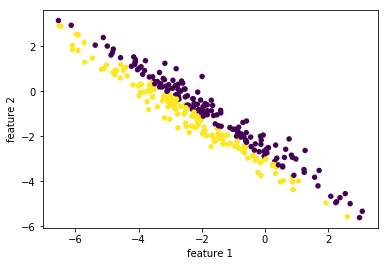

In [2]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2");

In [3]:
X_blob.shape

(300, 2)

In [4]:
X_blob

array([[ -2.89997280e+00,  -4.88814135e-01],
       [ -3.68791547e+00,  -8.20872533e-01],
       [  8.61179850e-01,  -3.79061630e+00],
       [ -2.75571044e+00,   9.78166614e-02],
       [ -2.77872064e+00,  -4.65727170e-01],
       [ -1.89354514e+00,  -5.48406119e-01],
       [ -7.62970224e-01,  -2.03870233e+00],
       [ -2.60462204e+00,   3.60935420e-01],
       [  8.88731845e-01,  -4.37156946e+00],
       [ -1.42660059e-01,  -1.99798966e+00],
       [ -3.22183052e+00,   5.66979184e-01],
       [ -2.45462349e+00,  -2.00569419e-01],
       [ -1.19554449e+00,  -2.36124300e+00],
       [ -2.78127009e+00,  -3.94875747e-01],
       [ -2.27003358e+00,  -8.37926934e-01],
       [ -3.63213123e+00,   7.54051753e-04],
       [ -2.25640768e+00,  -8.45472595e-01],
       [ -1.57470786e+00,  -1.45137651e+00],
       [  3.53157596e-01,  -3.36770400e+00],
       [  9.14184108e-01,  -3.73487418e+00],
       [ -2.82507270e+00,  -1.59749416e-01],
       [ -1.44660075e+00,  -1.65146364e+00],
       [  

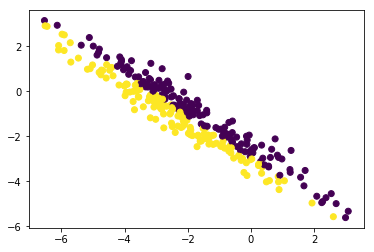

In [5]:
plt.scatter(X_blob[:,0],X_blob[:,1],c=y)

** 1. ** Fit a PCA model to the dataset.

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca_sk=PCA(2)
pca_sk.fit(X_blob)   

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca_sk.components_

array([[ 0.74827666, -0.6633868 ],
       [ 0.6633868 ,  0.74827666]])

In [36]:
pca_sk.explained_variance_

array([ 6.46578116,  0.14555253])

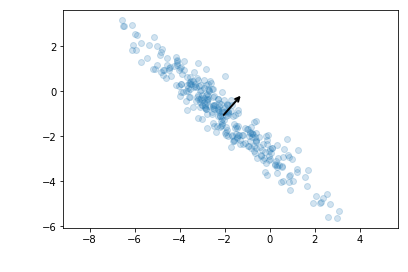

In [37]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_blob[:, 0], X_blob[:, 1], alpha=0.2)
for length, vector in zip(pca_sk.explained_variance_, pca_sk.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_sk.mean_, pca_sk.mean_ + v)
plt.axis('equal');

** 2. ** Transfrom the data and plot it.

In [26]:
pca_sk=PCA(1)
X_trans=pca_sk.fit_transform(X_blob)
X_trans.shape

(300, 1)

In [27]:
X_new = pca_sk.inverse_transform(X_trans)

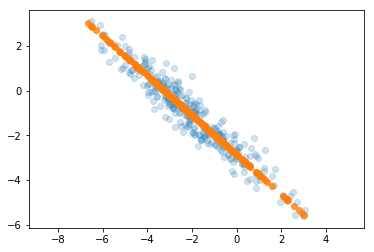

In [28]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

# Iris

Iris is a classic dataset for PCA. 

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from seaborn import load_dataset
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [15]:
iris = load_dataset('iris')

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


** 1. ** Apply PCA to the iris dataset

In [107]:
# standardscaler

from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = iris.loc[:, features].values
# Separating out the target
y = iris.loc[:,['species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [48]:
x.shape

(150, 4)

In [51]:
pca=PCA(2)
pca.fit(x)
X_pca=pca.transform(x)
X_pca.shape

(150, 2)

In [52]:
print("Components: ", pca.components_)
print("Exp. Var.:  ",pca.explained_variance_)

Components:  [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Exp. Var.:   [ 2.93808505  0.9201649 ]


In [56]:
x.shape

(150, 4)

In [71]:
X_pca.shape

(150, 2)

In [90]:
y=np.arange(150)
type(y)

numpy.ndarray

In [133]:
ddd = {'setosa':1,'versicolor':2,'virginica':3}
colour = iris.species.map(ddd)
type(colour)

pandas.core.series.Series

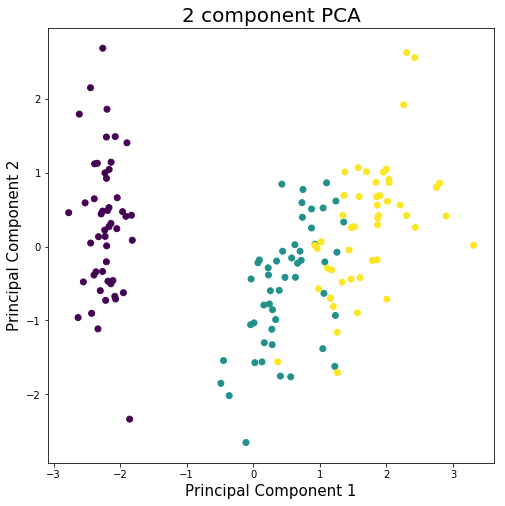

In [138]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(X_pca[:,0],X_pca[:,1],c=colour)

### Ref: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

** 2. ** Make a plot of the explained varriance.

<Container object of 2 artists>

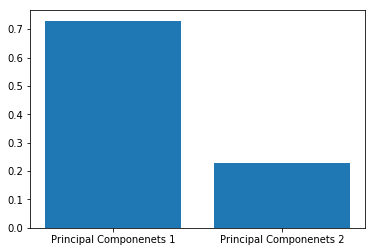

In [77]:
r = pca.explained_variance_ratio_
plt.bar(['Principal Componenets 1','Principal Componenets 2'],r)

** 3. **  Visualize the iris dataset using the first two principal components, and compare this visualization to using two of the original features.

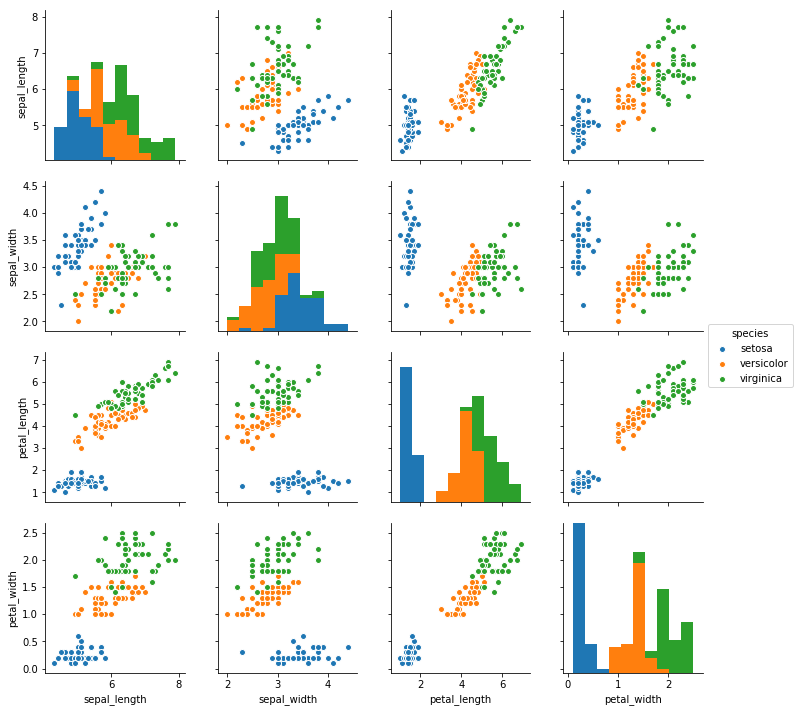

In [79]:
sns.pairplot(iris,hue="species")

** 4. ** What does the visulization tell you about the dataset?

# Images

The output from PCA gives us a lower dimensional representation of the dataset that still explains it very we'll. In machine learning we'd say we extracted features from the dataset. In this section we'll apply PCA and then reverse it to reconstruct the  image from these features. If we can reconstruct the image we'll from just the features we extracted this must mean that they are capturing information about the image well.


In [139]:
import matplotlib.image as mpimg

In [141]:
img = mpimg.imread('wild.png')
img.shape # hight, width , channels ( RGB)

(711, 996, 3)

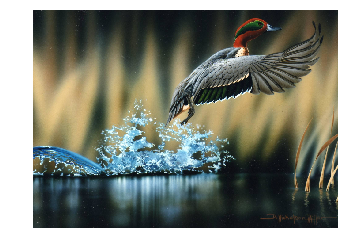

In [142]:
plt.axis('off')
plt.imshow(img)

The image is currently 3D lets reshape into a format that PCA can understand.

In [143]:
h, w, c = img.shape
img_r = np.reshape(img, (711, w * c))
img_r.shape

(711, 2988)

** 1. ** Apply fit a PCA  model onto the image using 64 components. How much variance is explained by the compnents?

In [202]:
pca=PCA(22)
x_pca=pca.fit_transform(img_r)
x_pca.shape

(711, 22)

In [203]:
print("Components: ", pca.components_)
print("Exp. Var.:  ",pca.explained_variance_)

Components:  [[ -1.88460350e-02  -1.47088403e-02  -7.57428817e-03 ...,  -1.54859051e-02
   -1.40557801e-02  -9.38245468e-03]
 [ -1.01792431e-02  -4.80672857e-03   1.72574294e-03 ...,  -1.33719584e-02
   -7.53931655e-03  -2.39848276e-03]
 [  3.78222875e-02   3.01842429e-02   2.08079349e-02 ...,   6.02985453e-03
    6.60839770e-03   4.55350243e-03]
 ..., 
 [  1.51795847e-02   1.89261083e-02   1.44683849e-02 ...,   1.33003807e-02
    8.21140222e-03  -1.24282390e-03]
 [ -1.23720793e-06  -3.60845285e-03  -5.99170895e-03 ...,  -2.07703654e-02
   -2.31271256e-02  -1.86122824e-02]
 [ -3.01205693e-03   8.12079851e-03   2.09808610e-02 ...,  -1.94902197e-02
   -1.29897073e-02  -6.96399529e-03]]
Exp. Var.:   [ 75.81996918  23.2682457    7.56183147   5.36337519   3.50373578
   3.18837547   2.0761826    1.8483032    1.688905     1.36298394
   1.19564593   1.1506356    0.82534951   0.79620773   0.70931369
   0.68559849   0.5623942    0.54258353   0.52222985   0.45279172
   0.43545026   0.42736575]


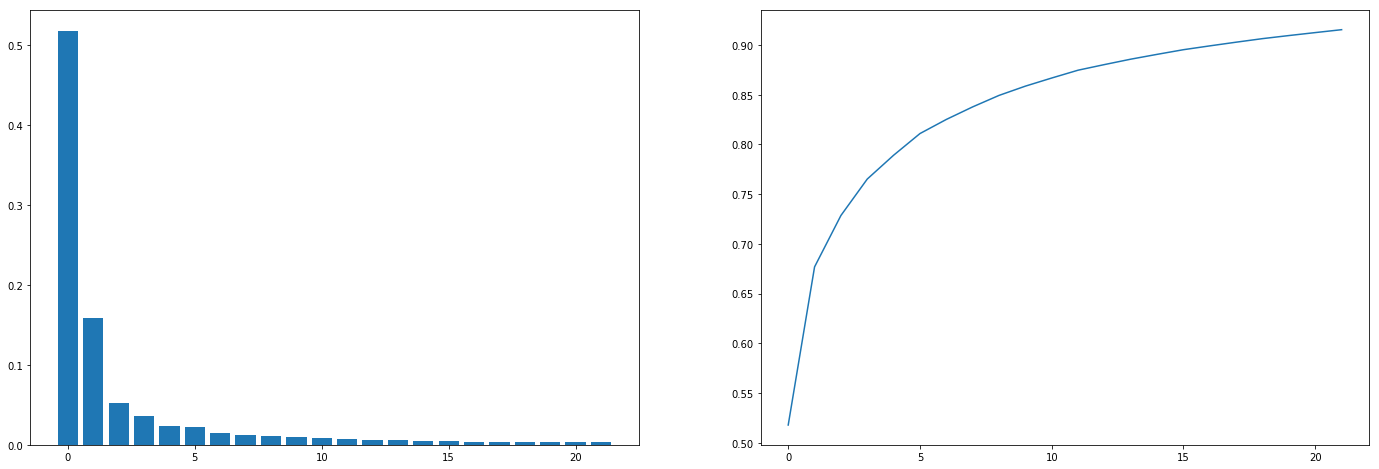

In [210]:
fig,axes = plt.subplots(1,2,figsize=(24,8))

r = pca.explained_variance_ratio_
axes[0].bar(range(22),r)
axes[1].plot(range(22),np.cumsum(r))
#plt.plot([64, 64], [0, 1], 'k-')

** 2. ** Transfrom the image using the PCA model. What is the shape of the transformed image? 

In [211]:
x_new = pca.inverse_transform(x_pca)

In [212]:
x_new.shape

(711, 2988)

In [213]:
img_new = np.reshape(x_new, (711, 996, 3))

In [214]:
img_new.shape

(711, 996, 3)

** 3. ** Reverse the transformation, reshape the image back to it orginal shape and then plot the image.

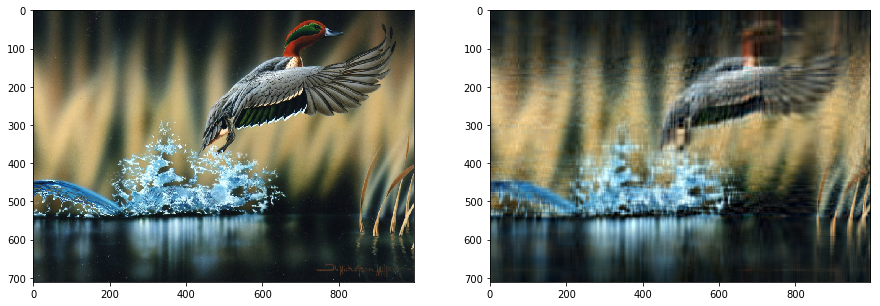

In [217]:
fig, axes = plt.subplots(1,2,figsize=(15,30))
axes[0].imshow(img)
axes[1].imshow(img_new.clip(0,1))
#axes[0].axis('off')
#axes[1].axis('off')

### Ref: https://shankarmsy.github.io/posts/pca-sklearn.html
